# IN_SYS SW10, HS2025 - Work 2
## Train Neuronal Network to classify hand written digits (0 - 9)
### 2025-11-18, Eugen Rodel

In [1]:
#!pip install tensorflow

Anaconda Navigator:
- create a new environment, e.g. "tf_env" with python v. 3.11
- install tensorflow (v. 2.19.1), matplotlib (v. 3.10.6) , scikit-learn (v. 1.7.1), pandas (v. 2.3.3), numpy (v. 1.26.4)

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Load the MNIST dataset (handwritten digits 0-9)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display the shape of the training and test data for understanding the dataset structure
print("Shape of x_train:", x_train.shape)  # (60000, 28, 28)
print("Shape of y_train:", y_train.shape)  # (60000,)
print("Shape of x_test:", x_test.shape)    # (10000, 28, 28)
print("Shape of y_test:", y_test.shape)    # (10000,)



Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


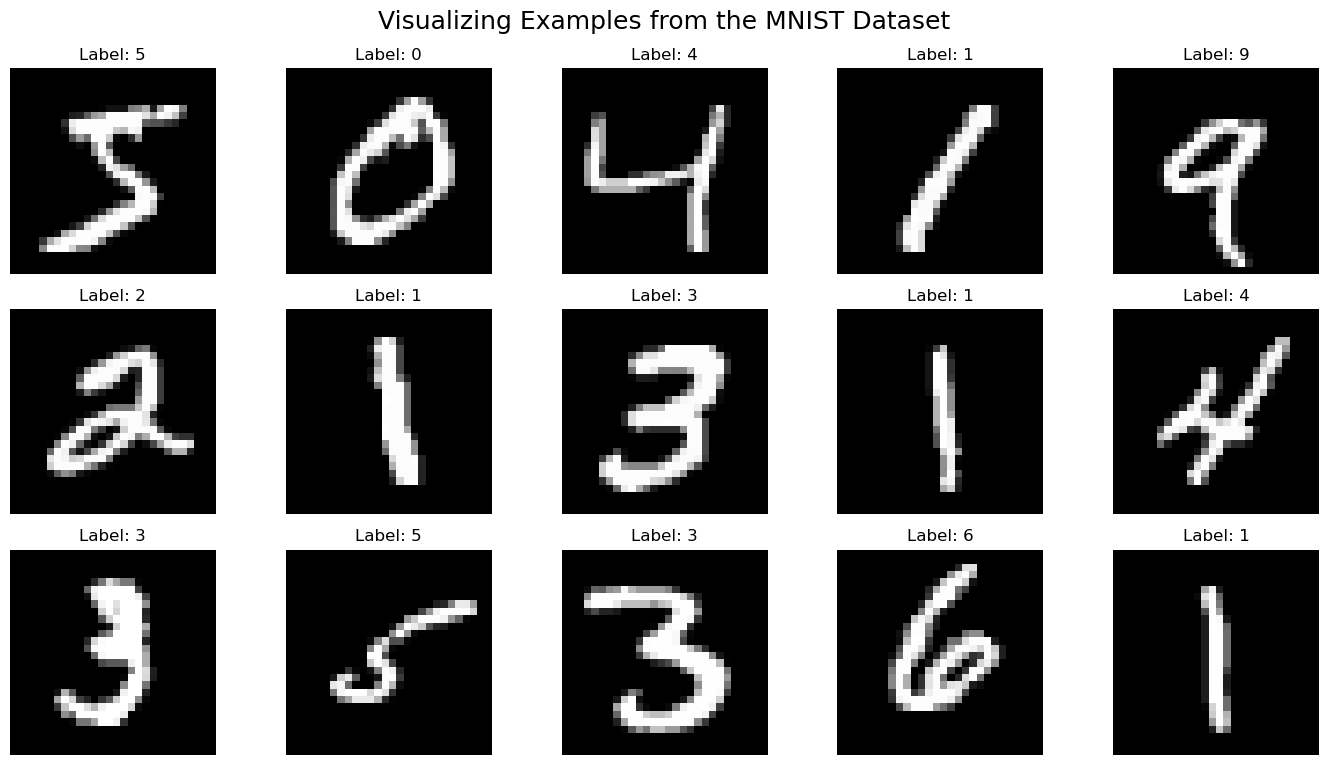

In [4]:
# Visualize a few examples from the training set
plt.figure(figsize=(14, 8))

# Display the first 15 images from the training set with labels
for i in range(15):
    plt.subplot(3, 5, i + 1)  # Create a 3x5 grid of subplots
    plt.imshow(x_train[i], cmap='gray')  # Display the image in grayscale
    plt.title(f'Label: {y_train[i]}')   # Show the label as the title
    plt.axis('off')  # Remove the axes for cleaner visualization

# Add a main title for the visualization
plt.suptitle('Visualizing Examples from the MNIST Dataset', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 1])  # Adjust layout to fit the main title
plt.show()

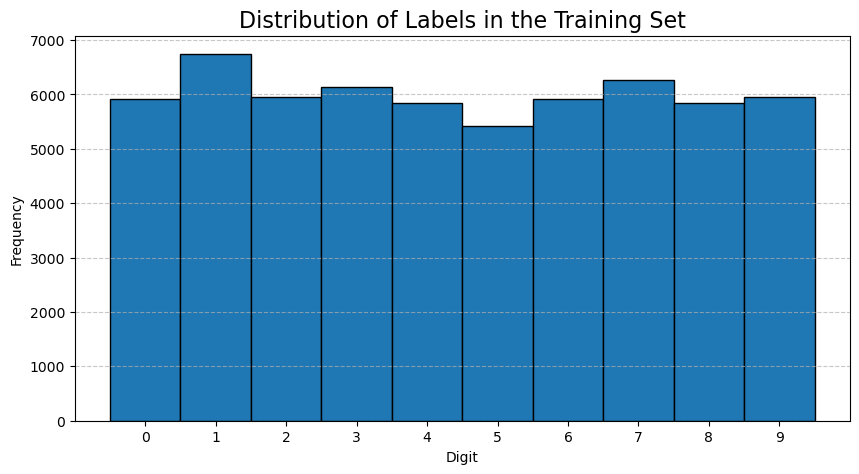

In [5]:
# Plot a histogram showing the distribution of labels in the training set
plt.figure(figsize=(10, 5))
plt.hist(y_train, bins=np.arange(11) - 0.5, edgecolor='black')
plt.title('Distribution of Labels in the Training Set', fontsize=16)
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.xticks(np.arange(10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

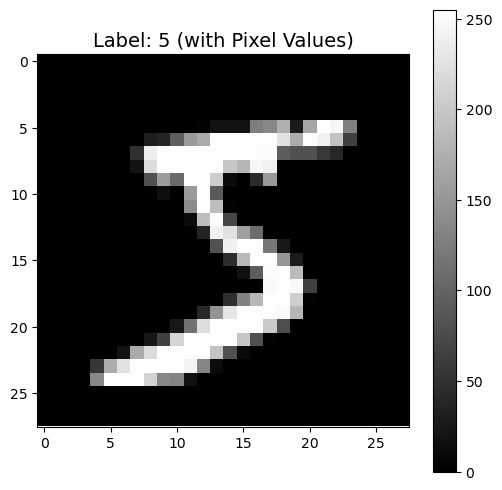

In [6]:
# Show a single image with pixel values for better understanding
plt.figure(figsize=(6, 6))
plt.imshow(x_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]} (with Pixel Values)', fontsize=14)
plt.colorbar()  # Show color scale to represent pixel intensity
plt.show()

In [7]:
# Print the pixel values of the first training image for detailed understanding
print("Pixel values of the first training image (28x28 matrix):")
print(x_train[0])

Pixel values of the first training image (28x28 matrix):
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0  

In [8]:
# Preprocess the data by normalizing it to the range [0, 1]
x_train = x_train / 255.0  # Normalize training data
x_test = x_test / 255.0    # Normalize test data

# Flatten the images from 28x28 matrices to 784-dimensional vectors for input
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [10]:
# Build a simple neural network model
model = models.Sequential([
    layers.InputLayer(shape=(784,)),  # Input layer with 784 inputs
    layers.Dense(128, activation='relu'),   # First hidden layer with 128 neurons and ReLU activation
    layers.Dense(64, activation='relu'),    # Second hidden layer with 64 neurons and ReLU activation
    layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each digit) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Create a TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='logs', histogram_freq=1)

# Create a ModelCheckpoint callback to save the best model during training
checkpoint_callback = ModelCheckpoint(filepath='MINST-Handwritten-model_checkpoint.keras', save_best_only=True)



In [11]:
# Display the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the model and save the training history for visualization
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=[tensorboard_callback, checkpoint_callback])

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9234 - loss: 0.2645 - val_accuracy: 0.9613 - val_loss: 0.1310
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9662 - loss: 0.1093 - val_accuracy: 0.9660 - val_loss: 0.1153
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9768 - loss: 0.0752 - val_accuracy: 0.9699 - val_loss: 0.1002
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9811 - loss: 0.0580 - val_accuracy: 0.9728 - val_loss: 0.0892
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9860 - loss: 0.0444 - val_accuracy: 0.9735 - val_loss: 0.0955
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9884 - loss: 0.0350 - val_accuracy: 0.9736 - val_loss: 0.0976
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9904 - loss: 0.0294 - val_accuracy: 0.9733 - val_loss: 0.1078
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9913 -

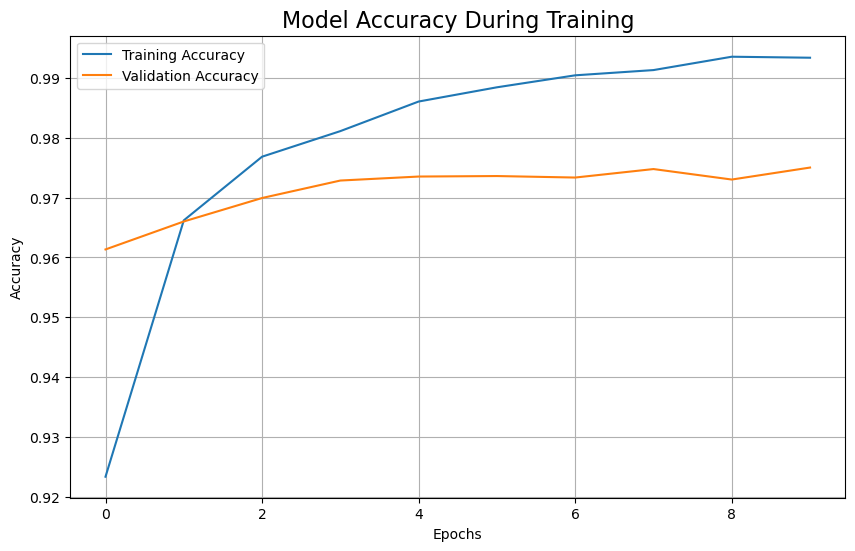

In [13]:
# Plot training and validation accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy During Training', fontsize=16)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Evaluate the model on the test set and display the test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc:.4f}')

Test accuracy: 0.9772


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


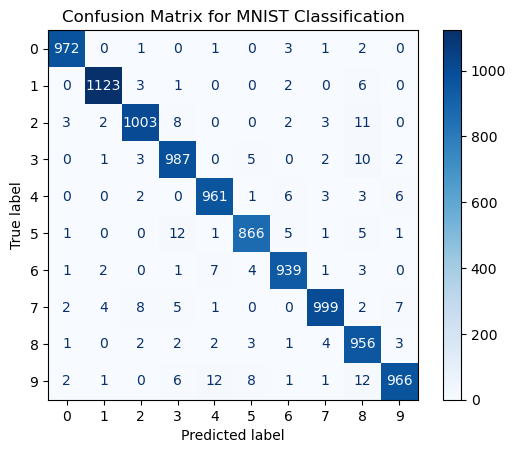

In [15]:
# Make predictions on the test set
y_pred = np.argmax(model.predict(x_test), axis=1)

# Plot confusion matrix to visualize the model's performance on different digits
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(10))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()

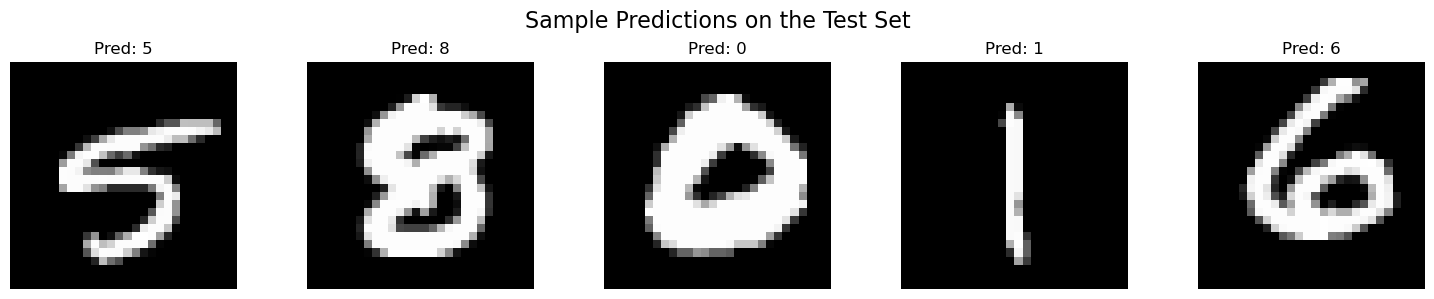

In [16]:
# Display a few sample predictions with their corresponding images
num_samples = 5
indices = np.random.choice(x_test.shape[0], num_samples, replace=False)
plt.figure(figsize=(15, 3))
for i, idx in enumerate(indices):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {y_pred[idx]}')
    plt.axis('off')
plt.suptitle('Sample Predictions on the Test Set', fontsize=16)
plt.tight_layout()
plt.show()